In [ ]:
!unrar x /content/Q4_FACES.rar

In [ ]:
cd FACES

/content/FACES


In [ ]:
def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)

    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = imageio.imread(os.path.join(root, file)) # Load image from a path
            face = face.reshape(256 * 256, ).tolist()          # Flatten image . Note: size of any image is 256,256
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label

In [ ]:
import imageio
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
X_train, y_train= loadImages("/content/FACES/train")
X_test, y_test= loadImages("/content/FACES/test")

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

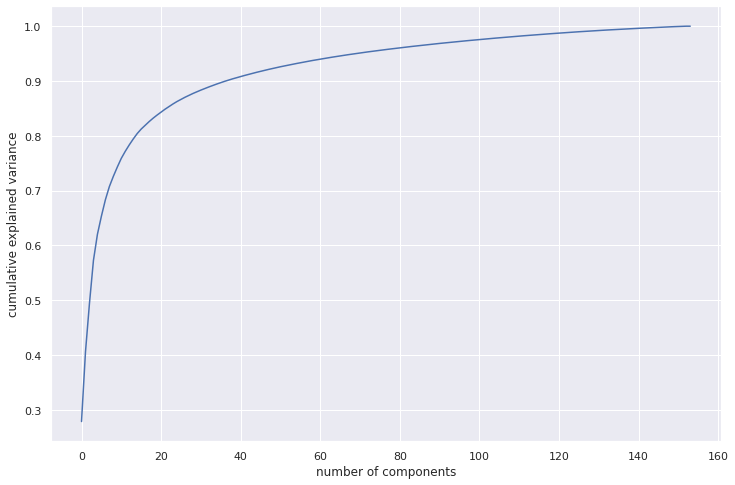

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()
pca = PCA().fit(X_train)
X_train_pca=pca.transform(X_train)
plt.subplots(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Text(0.5, 1.0, 'Scree Plot')

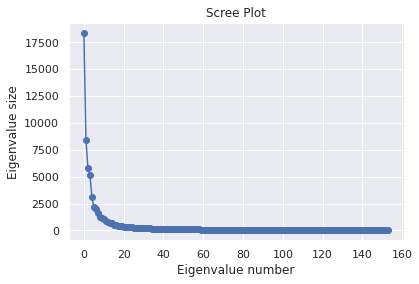

In [ ]:
pca.explained_variance_
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

# first 4 PCA

In [ ]:
import random
lab=y_train[random.randint(0,len(y_train)-1)]
indexes= np.where(np.array(y_train) ==lab )

In [ ]:
class_data=X_train[indexes]
pca_estimator = PCA(n_components = class_data.shape[0], whiten=True)
pca_estimator.fit(class_data)

PCA(n_components=18, whiten=True)

In [ ]:
f'eighen values = {[i for i in (pca_estimator.singular_values_[:16])]}'

'eighen values = [699.1881034476216, 487.4338162322371, 418.6432146038381, 359.9591129022988, 326.9340348043721, 275.42083443795923, 231.49985512403242, 205.98659607419347, 197.86417264776745, 137.48703954328067, 126.16583204130089, 116.13925765417399, 107.50793155725768, 106.95098294384526, 103.19731900619962, 88.25505676916315]'

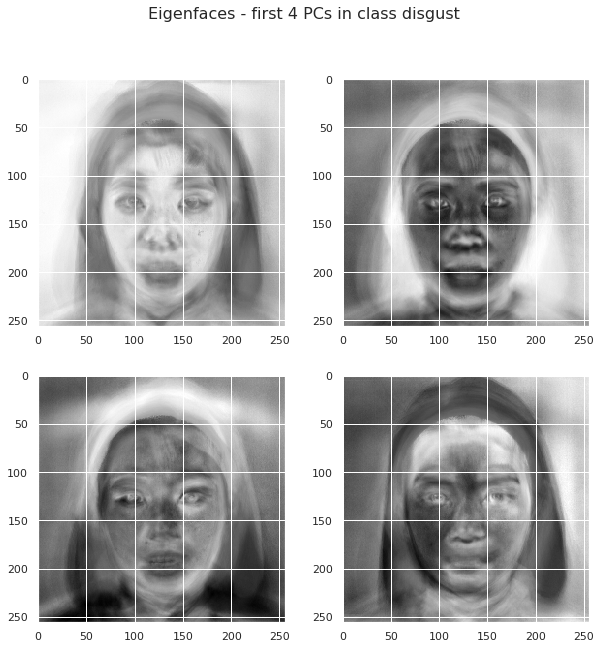

In [ ]:

fig, axs = plt.subplots(2,2,figsize=(10, 10),)
fig.suptitle("Eigenfaces - first 4 PCs in class {}".format(lab), size=16)
for ax, img in zip(axs.flat, pca.components_[:4]):
      vmax = max(img.max(), -img.min())
      im=ax.imshow(img.reshape(256,256),
        cmap="gray",
        interpolation="nearest",
        vmin=-vmax,
        vmax=vmax)


#plot_gallery("Eigenfaces - first 4 PCs", pca.components_[:4],)

#plot_gallery("Eigenfaces - last 4 PCs", pca.components_[-4:])

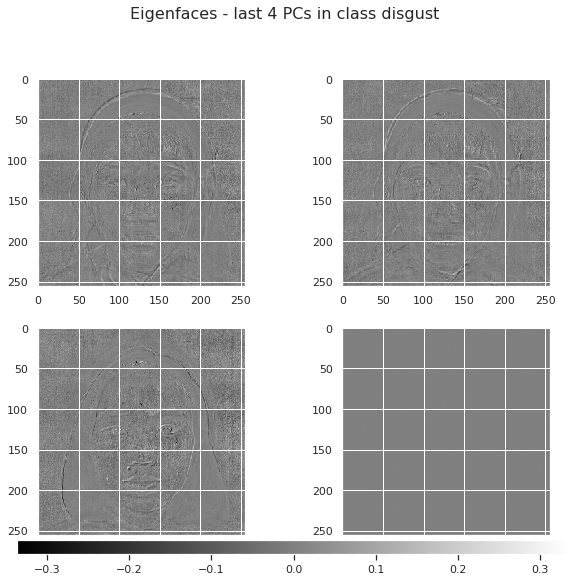

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10, 10),)
fig.suptitle("Eigenfaces - last 4 PCs in class {}".format(lab), size=16)
for ax, img in zip(axs.flat, pca.components_[-4:]):
      vmax = max(img.max(), -img.min())
      im=ax.imshow(img.reshape(256,256),
        cmap="gray",
        interpolation="nearest",
        vmin=-vmax,
        vmax=vmax)

fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
plt.show()

# Without PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

In [ ]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train, y_train)

neigh2 = KNeighborsClassifier(n_neighbors=2)
neigh2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

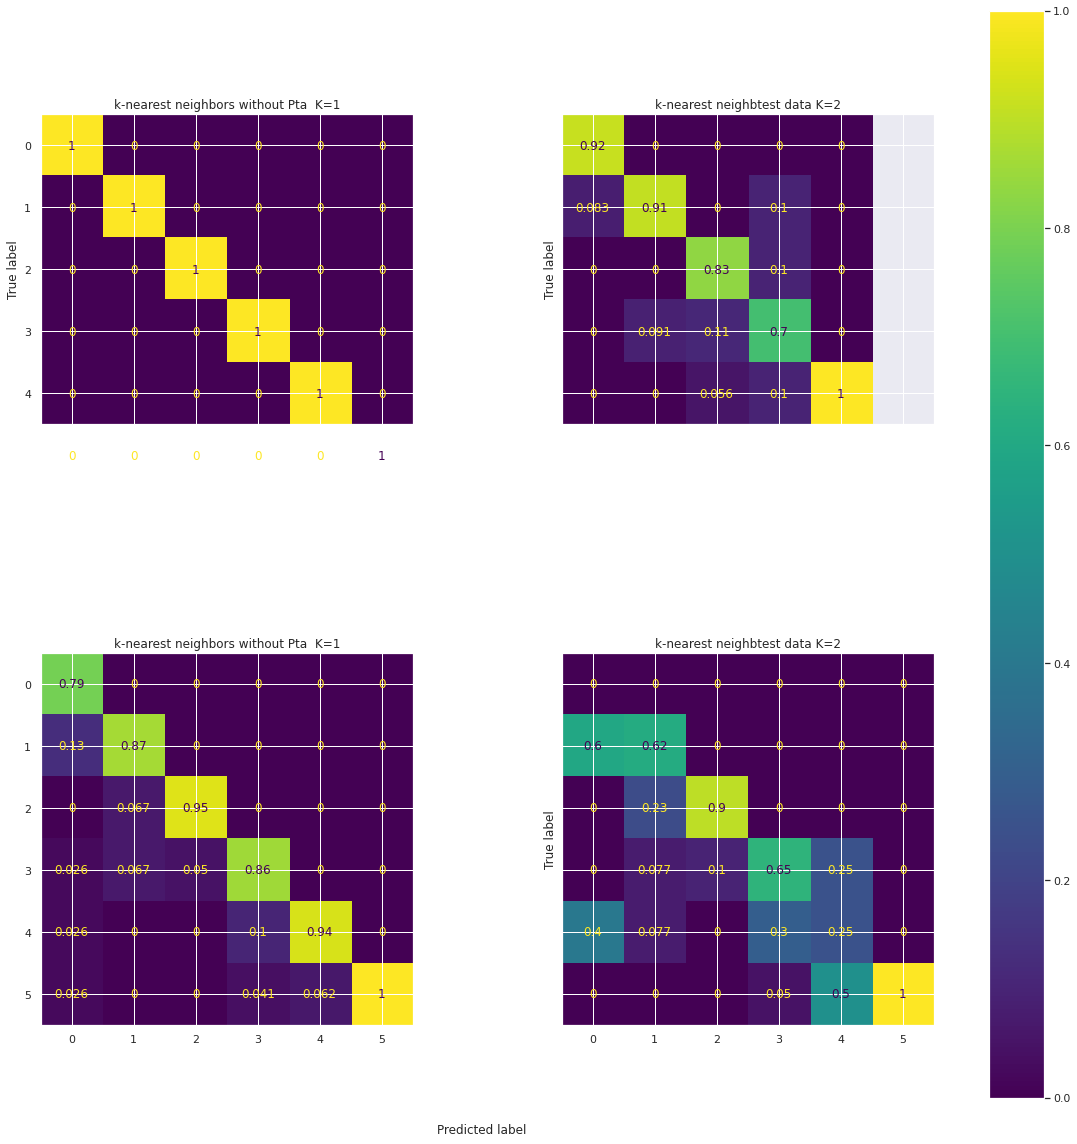

In [ ]:
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[X_train,X_test]
labels=[y_train,y_test]
tt=["k-nearest neighbors without PCA for train data ","k-nearest neighbors without PCA for test data"]
for i in range(2):
    y_pred=neigh1.predict(data[i])
    result = confusion_matrix(labels[i], y_pred , normalize='pred' )
    disp = ConfusionMatrixDisplay(confusion_matrix=result)
    disp.plot(ax= axarr[0, i])
    disp.ax_.set_title(tt[i]+" K={}".format(i+1))
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    y_pred=neigh2.predict(data[i])
    result = confusion_matrix(labels[i], y_pred , normalize='pred' )
    disp = ConfusionMatrixDisplay(confusion_matrix=result)
    disp.plot(ax= axarr[1, i])
    disp.ax_.set_title(tt[i]+" K={}".format(i+1))
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i==0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axarr)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Train data with K=1:")
print(classification_report(neigh1.predict(X_train), y_train))
print("*************************************************************")
print("Test data with K=1:")
print(classification_report(neigh1.predict(X_test), y_test))

print("Train data with K=2:")
print(classification_report(neigh2.predict(X_train), y_train))
print("*************************************************************")
print("Test data with K=2:")
print(classification_report(neigh2.predict(X_test), y_test))

Train data with K=1:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        30
     disgust       1.00      1.00      1.00        18
        fear       1.00      1.00      1.00        20
       happy       1.00      1.00      1.00        45
         sad       1.00      1.00      1.00        21
    surprise       1.00      1.00      1.00        20

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

*************************************************************
Test data with K=1:
              precision    recall  f1-score   support

     disgust       1.00      0.92      0.96        12
        fear       0.83      0.91      0.87        11
       happy       0.94      0.83      0.88        18
         sad       0.70      0.70      0.70        10
    surprise       0.80      1.00      0.89         8

    accuracy                

# With PCA

In [ ]:
pca = PCA(15).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

neigh_pca1 = KNeighborsClassifier(n_neighbors=1)
neigh_pca1.fit(X_train_pca, y_train)

neigh_pca2 = KNeighborsClassifier(n_neighbors=2)
neigh_pca2.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=2)

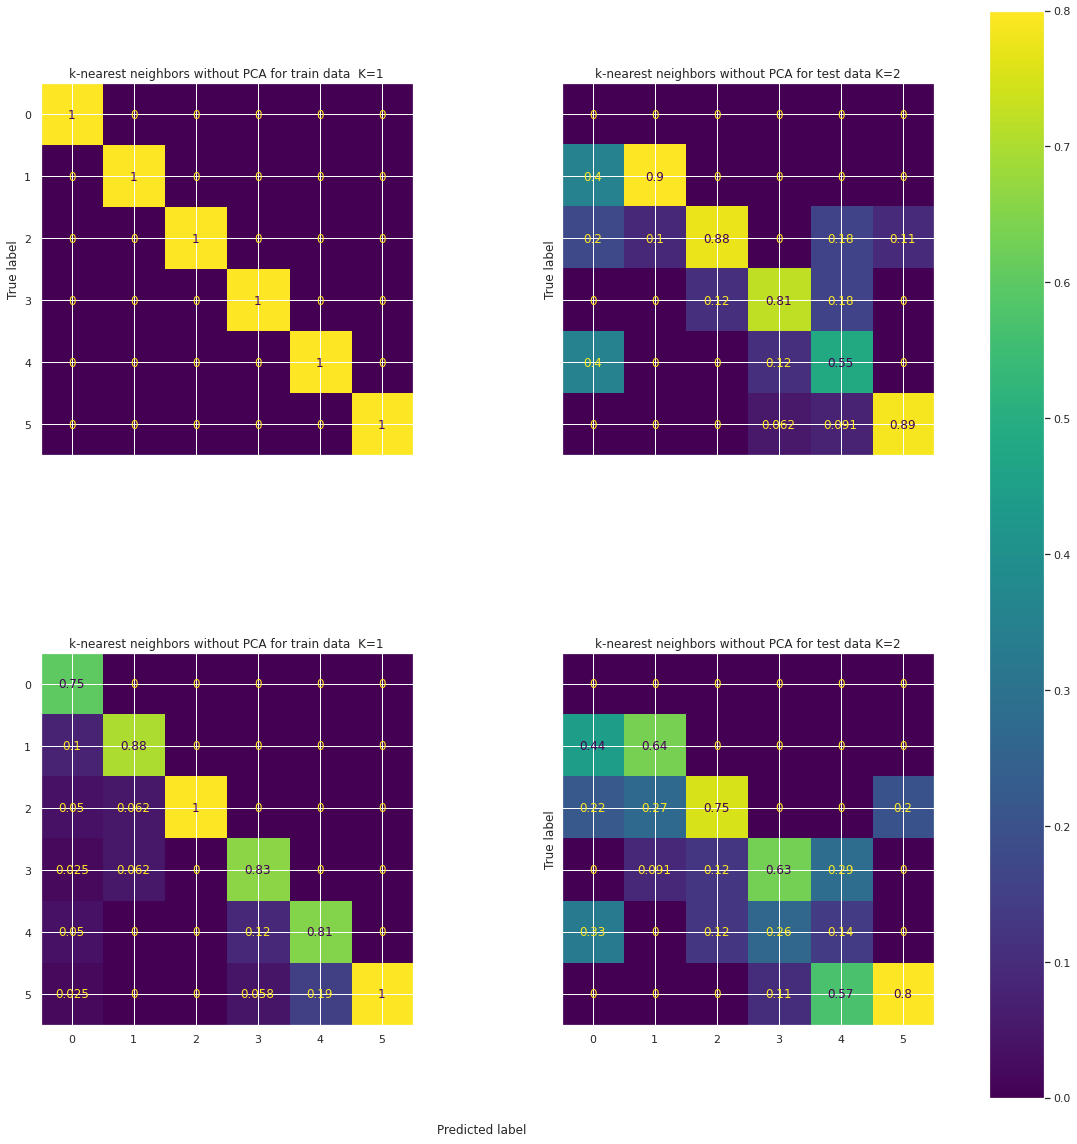

In [ ]:
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[X_train_pca,X_test_pca]
labels=[y_train,y_test]
tt=["k-nearest neighbors without PCA for train data ","k-nearest neighbors without PCA for test data"]
for i in range(2):
    y_pred=neigh_pca1.predict(data[i])
    result = confusion_matrix(labels[i], y_pred , normalize='pred' )
    disp = ConfusionMatrixDisplay(confusion_matrix=result)
    disp.plot(ax= axarr[0, i])
    disp.ax_.set_title(tt[i]+" K={}".format(i+1))
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    y_pred=neigh_pca2.predict(data[i])
    result = confusion_matrix(labels[i], y_pred , normalize='pred' )
    disp = ConfusionMatrixDisplay(confusion_matrix=result)
    disp.plot(ax= axarr[1, i])
    disp.ax_.set_title(tt[i]+" K={}".format(i+1))
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i==0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axarr)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Train data with K=1:")
print(classification_report(neigh_pca1.predict(X_train_pca), y_train))
print("*************************************************************")
print("Test data with K=1:")
print(classification_report(neigh_pca1.predict(X_test_pca), y_test))

print("Train data with K=2:")
print(classification_report(neigh_pca2.predict(X_train_pca), y_train))
print("*************************************************************")
print("Test data with K=2:")
print(classification_report(neigh_pca2.predict(X_test_pca), y_test))

Train data with K=1:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        30
     disgust       1.00      1.00      1.00        18
        fear       1.00      1.00      1.00        20
       happy       1.00      1.00      1.00        45
         sad       1.00      1.00      1.00        21
    surprise       1.00      1.00      1.00        20

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

*************************************************************
Test data with K=1:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         5
     disgust       0.82      0.90      0.86        10
        fear       0.58      0.88      0.70         8
       happy       0.81      0.81      0.81        16
         sad       0.60      0.55      0.57        11
    surprise       0.80      

In [ ]:
from sklearn.metrics import accuracy_score
acc_value_train=[]
acc_value_test=[]
for i in range(1, X_train.shape[0]):
  pca = PCA(n_components = i).fit(X_train)
  X_train_pca=pca.transform(X_train)
  X_test_pca=pca.transform(X_test)
  neigh_pca2 = KNeighborsClassifier(n_neighbors=2)
  neigh_pca2.fit(X_train_pca,y_train)
  y_pred=neigh_pca2.predict(X_train_pca)
  acc_value_train.append(accuracy_score(y_train, y_pred))
  y_pred=neigh_pca2.predict(X_test_pca)
  acc_value_test.append(accuracy_score(y_test, y_pred))

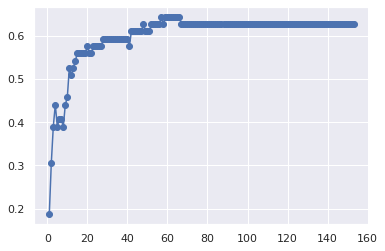

In [ ]:
plt.plot(np.arange(1,X_train.shape[0]),acc_value_test, '-o')
plt.show()

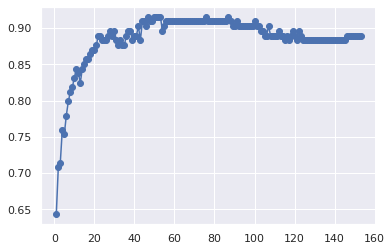

In [ ]:
plt.plot(np.arange(1,X_train.shape[0]),acc_value_train, '-o')
plt.show()